In [1]:
pip install yfinance pandas numpy matplotlib statsmodels tensorflow scikit-learn #installing necc libraries


Note: you may need to restart the kernel to use updated packages.


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [3]:
# Fetch stock data for a specific ticker
ticker = "AAPL" # Change ticker
start_date = "1999-01-01"
end_date = "2024-12-19"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]
data.dropna(inplace=True)
data.head()


[*********************100%%**********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp\ipykernel_3152\2390719982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Close
Date,
1999-01-04,0.368304
1999-01-05,0.386719
1999-01-06,0.372768
1999-01-07,0.401786
1999-01-08,0.401786


In [4]:
# Separate data for training and 2023-forecast visualization
train_data = data[data.index < '2023-01-01']
test_data = data[data.index >= '2023-01-01']


In [5]:
# Add moving averages and other indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data.dropna(inplace=True)
data.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3152\605833454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_20'] = data['Close'].rolling(window=20).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3152\605833454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['Close'].rolling(window=50).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3152\605833454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Close,SMA_20,SMA_50,EMA_12,EMA_26
Date,,,,,
1999-03-16,0.316964,0.313142,0.343460,0.306301,0.318078
1999-03-17,0.304129,0.311830,0.342176,0.305967,0.317045
1999-03-18,0.316964,0.311607,0.340781,0.307659,0.317039
1999-03-19,0.299107,0.309961,0.339308,0.306343,0.315710
1999-03-22,0.313058,0.308454,0.337534,0.307376,0.315514


In [6]:
# Train ARIMA model
arima_model = ARIMA(data['Close'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Predict the next day's price
next_day_arima = arima_model_fit.forecast(steps=1).iloc[0] if isinstance(arima_model_fit.forecast(steps=1), pd.Series) else arima_model_fit.forecast(steps=1)[0]
print(f"ARIMA Prediction for next day: {next_day_arima}")


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

ARIMA Prediction for next day: 248.02844771821935


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  re

In [7]:
# Scale and prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Sequence length for LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [8]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X, y, batch_size=1, epochs=10)


Epoch 1/10


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6424/6424 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - loss: 9.4460e-04
Epoch 2/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 66s 10ms/step - loss: 2.1527e-04
Epoch 3/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 67s 10ms/step - loss: 1.5492e-04
Epoch 4/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 68s 11ms/step - loss: 1.1099e-04
Epoch 5/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 66s 10ms/step - loss: 1.1348e-04
Epoch 6/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 66s 10ms/step - loss: 1.1661e-04
Epoch 7/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 66s 10ms/step - loss: 9.8363e-05
Epoch 8/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 75s 12ms/step - loss: 8.8135e-05
Epoch 9/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 9.8001e-05
Epoch 10/10
6424/6424 ━━━━━━━━━━━━━━━━━━━━ 84s 13ms/step - loss: 8.7960e-05


In [9]:
# Prepare data for next 10-day prediction
last_sequence = scaled_data[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

predictions = []
for _ in range(20):
    predicted_price = lstm_model.predict(last_sequence)[0]
    predictions.append(predicted_price)
    last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price]], axis=1)

# Scale predictions back to original range
predictions = scaler.inverse_transform(predictions).flatten()
mean_price_10_days = predictions.mean()
print(f"Mean price for next 10 days (LSTM): {mean_price_10_days}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean price for next 10 days (LSTM): 187.81409050979246


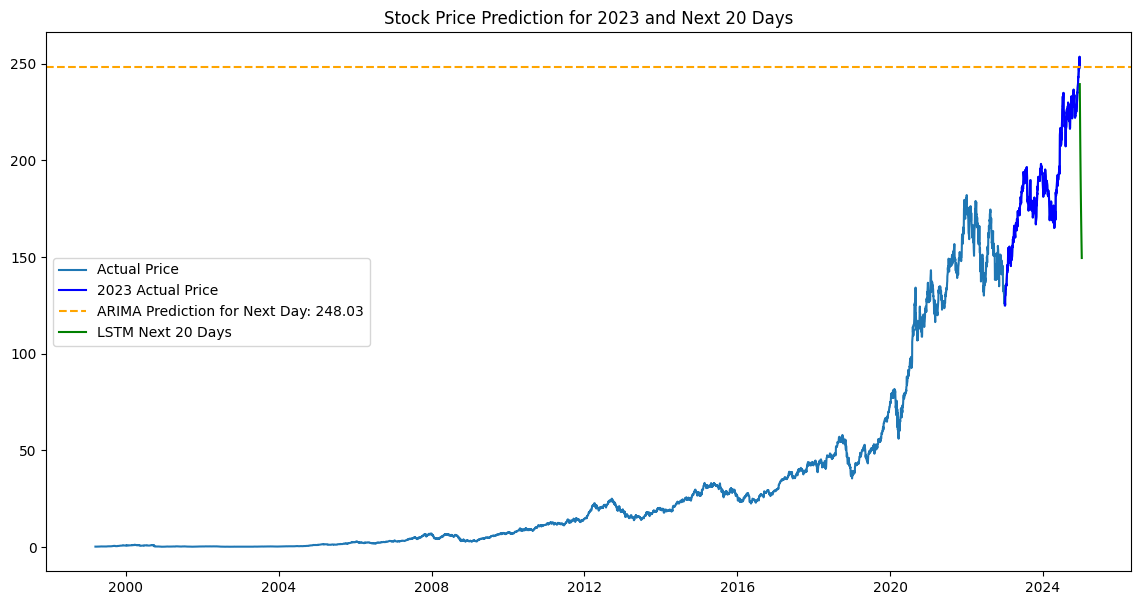

In [10]:
# Plot with updated data
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(data['Close'], label="Actual Price")

# Focus on 2023 data
plt.plot(test_data.index, test_data['Close'], label="2023 Actual Price", color='blue')

# Plot ARIMA prediction as a single point for the next day
plt.axhline(y=next_day_arima, color='orange', linestyle='--', label=f"ARIMA Prediction for Next Day: {next_day_arima:.2f}")

# Plot LSTM predictions for the next 20 days
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=20)
plt.plot(future_dates, predictions, label="LSTM Next 20 Days", color='green')

plt.legend()
plt.title("Stock Price Prediction for 2023 and Next 20 Days")
plt.show()


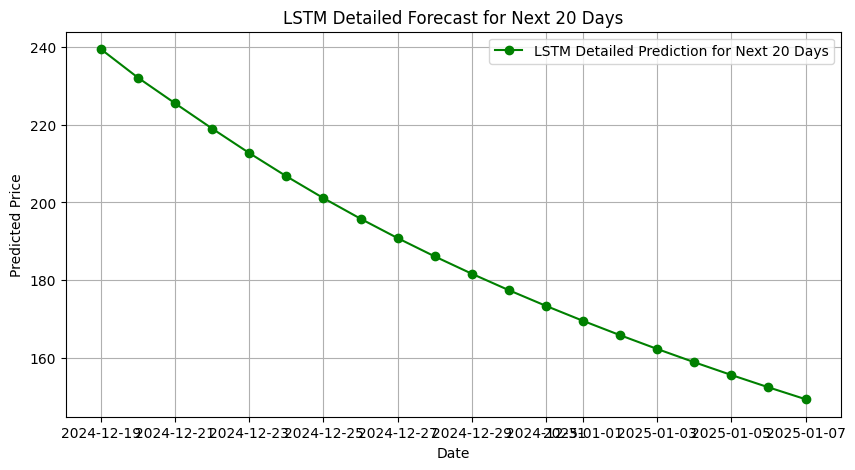

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(future_dates, predictions, marker='o', linestyle='-', color='green', label="LSTM Detailed Prediction for Next 20 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.title("LSTM Detailed Forecast for Next 20 Days")
plt.legend()
plt.grid()
plt.show()


In [12]:
print(f"ARIMA Prediction for Next Day: {next_day_arima}")
print(f"LSTM Predictions for Next 20 Days: {predictions}")


ARIMA Prediction for Next Day: 248.02844771821935
LSTM Predictions for Next 20 Days: [239.35242712 232.0243662  225.4465683  218.95965511 212.6821194
 206.7238802  201.10729264 195.82209239 190.8445054  186.14573116
 181.69680307 177.47092819 173.44460419 169.59758919 165.91272061
 162.37538685 158.97310465 155.69505119 152.5318376  149.47514674]
